In [ ]:
'''
  @author: Ed Horácio
  @description: Intro do AM
  @date: 25/08/2025
'''

# Introdução ao Aprendizado de Máquina (AM)

## O que é o AM?


## O que é PLN e LLMs
- Como PLN, LLM e DL se relacionam?

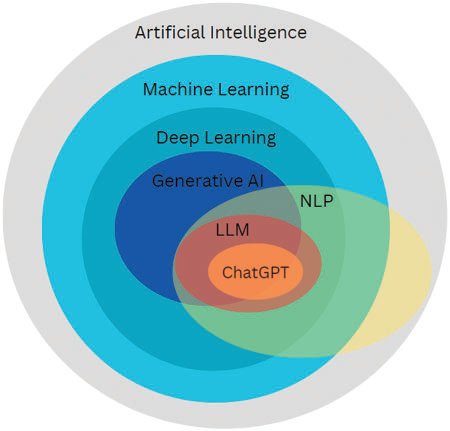

Fonte: Alomari (2024)

## KDD, Data Mining e ML

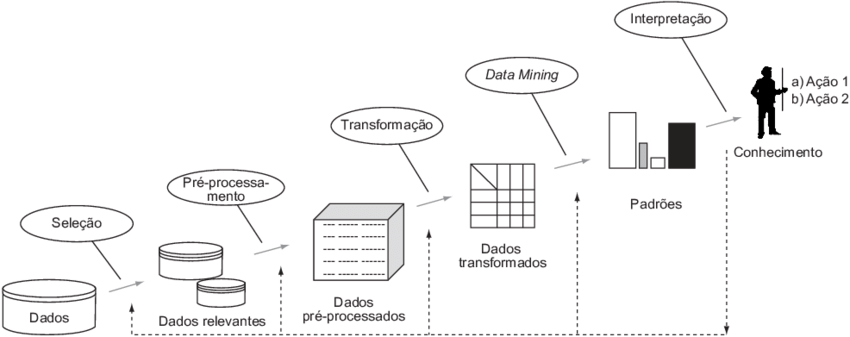

Fonte: Fayyad et. al. (1996)

- O que é eu quero, isto é, que problema preciso resolver?
- Quais domínios de aplicação isso envolve?
- Quais ferramentas preciso aprender?

Exemplo de Sistema Especialista de IA: [MYCIN](https://www.sciencedirect.com/science/article/abs/pii/0010480975900099)

- E se quisermos descobrir as regras? E se desejarmos criar métodos (algoritmos) que criem essas regras? É possível?

- Aprendizado de Máquina

Algoritmos que conseguem extrair padrões a partir de dados.

Útil quando temos muitos dados deseja-se descobrir padrões.

Quais tópicos fazem parte de determinado conjunto de textos? Pense na tarefa de analizar 10 000 documentos. Ou ainda mais: 100 000 documentos.

# Aprendizado Supervisionado

- Classificação: rótulo

###  1) Seleção dos dados

In [ ]:
import numpy as np
from sklearn import tree
X = np.array([[0, 0], [1, 1], [3, 3], [8, 9]])
Y = np.array([0, 1, 1, 1])# Não, sim

### 2) Pré-processamento dos dados

### 3) Transformação dos dados

### 4) Mineração dos dados

In [ ]:
# Fine tuning
# Parâmetros: números, flags, que o algoritmo descobre a partir dos dados
# Hiperparâmetros: os números, flags, que quem desenvolve o modelo ajusta a partir das métricas de desempenho
dt = tree.DecisionTreeClassifier(criterion='gini')

In [ ]:
print(dt.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


In [ ]:
dt.fit(X, Y)

DecisionTreeClassifier()

In [ ]:
import numpy as np

x_test = np.array([0, 0]).reshape(1, -1)
dt.predict(x_test)

array([0])

[Text(0.5, 0.75, 'x[1] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.625, 0.5, '  False')]

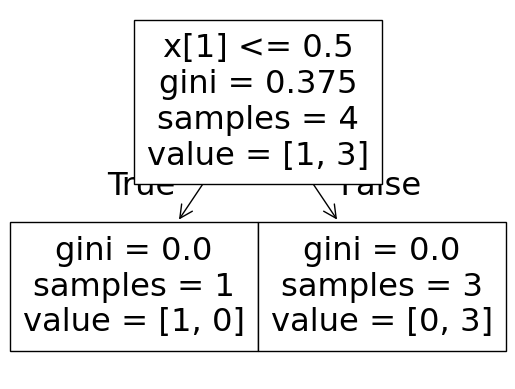

In [ ]:
tree.plot_tree(dt)

In [ ]:
dt2 = tree.DecisionTreeClassifier(criterion='entropy')

In [ ]:
print(dt2.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


In [ ]:
dt2.fit(X, Y)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5, 0.75, 'x[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.625, 0.5, '  False')]

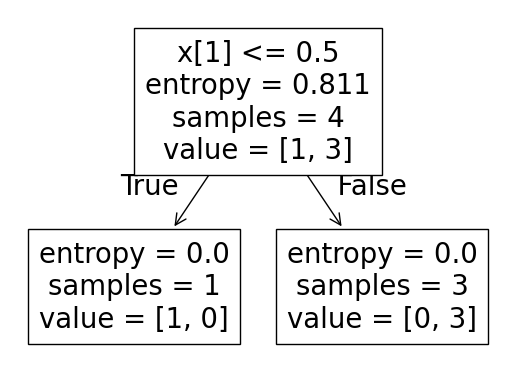

In [ ]:
tree.plot_tree(dt2)

In [ ]:
x_test_dt2 = np.array([0, 0]).reshape(1, -1)
dt2.predict(x_test_dt2)

array([0])

In [ ]:
# Busca dos melhores hiperparâmetros para o modelo

In [ ]:
# Quais são os hiperparâmetros que melhor se ajustam ao meu problema, ou seja, quais
# hiperparâmetros eles representam uma função objetivo que generaliza melhor o meu domínio de aplicação?

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
cancer_data = load_breast_cancer()
X, y = cancer_data.data, cancer_data.target

In [ ]:
print(X.shape)

(569, 30)


In [ ]:
X[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [ ]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 32),
                    max_iter=500, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=100, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

### 5) Avaliação do modelo

In [ ]:
y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 95.61%


In [ ]:
mlp.fit(X_train_scaler, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=100, random_state=42)

In [ ]:
y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 37.72%


### Problema do Balanceamento

- Regressão: número que indica quantidade

# Processamento de Linguagem Natural (PLN)

- Por "linguagem natural", entendemos uma linguagem usada na comunicação cotidiana por humanos.

A PNL é uma interseção de diversas áreas
* Ciência da Computação
* Inteligência Artificial
* Linguística

Componentes do MLP

* Natural Language Understanding (NLU)
* Natural Language Generation (NLG)